### Eventos
* **“viewed product”**:​ El usuario visita una página de producto.
* **“brand listing”**:​ El usuario visita un listado específico de una marca viendo un conjunto
de productos.
* **“visited site”**:​ El usuario ingresa al sitio a una determinada url.
* **“ad campaign hit”**:​ El usuario ingresa al sitio mediante una campana de marketing
online.
* **“generic listing”**:​ El usuario visita la homepage.
* **“searched products”**: ​ El usuario realiza una búsqueda de productos en la interfaz de
búsqueda del site.
* **“search engine hit”**:​ El usuario ingresa al sitio mediante un motor de búsqueda web.
* **“checkout”**:​ El usuario ingresa al checkout de compra de un producto.
* **“staticpage”**:​ El usuario visita una página
* **“conversion”**:​ El usuario realiza una conversión, comprando un producto.
* **“lead”**: ​ El usuario se registra para recibir una notificación de disponibilidad de stock,
para un producto que no se encontraba disponible en ese momento.

### ¿Se comportan de forma distinta dependiendo del tipo de fuente de tráfico al que pertenecen?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

In [2]:
types = {
 "event" : "category", 
 "person" : "category", 
 "url" : "category", 
 #"sku" : "float",
 "model" : "category", 
 "condition" : "category", 
 "storage" : "category", 
 "color" : "category", 
 "staticpage" : "category", 
 "campaign_source" : "category", 
 "search_engine" : "category", 
 "channel" : "category", 
 "new_vs_returning" : "category", 
 "city" : "category", 
 "region" : "category", 
 "country" : "category", 
 "device_type" : "category", 
 "screen_resolution" : "category", 
 "operating_system_version" : "category", 
 "browser_version" : "category", 
}

In [3]:
df =  pd.read_csv('fiuba-trocafone-tp1-final-set/events.csv', dtype=types, parse_dates=["timestamp"])

/home/carlos/Documentos/7506-OrgaDatos_2018/development/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

timestamp            event    person                        url  \
0 2018-05-31 23:38:05  ad campaign hit  0004b0a2  /comprar/iphone/iphone-5s   
1 2018-05-31 23:38:05     visited site  0004b0a2                        NaN   
2 2018-05-31 23:38:09   viewed product  0004b0a2                        NaN   
3 2018-05-31 23:38:40         checkout  0004b0a2                        NaN   
4 2018-05-29 13:29:25   viewed product  0006a21a                        NaN   

     sku              model condition storage           color skus  \
0    NaN                NaN       NaN     NaN             NaN  NaN   
1    NaN                NaN       NaN     NaN             NaN  NaN   
2   2694          iPhone 5s       Bom    32GB  Cinza espacial  NaN   
3   2694          iPhone 5s       Bom    32GB  Cinza espacial  NaN   
4  15338  Samsung Galaxy S8       Bom    64GB         Dourado  NaN   

         ...        search_engine channel new_vs_returning        city  \
0        ...                  NaN     NaN              NaN         NaN   
1        ...                  NaN    Paid              New  Camaragibe   
2        ...                  NaN     NaN              NaN         NaN   
3        ...                  NaN     NaN              NaN         NaN   
4        ...                  NaN     NaN              NaN         NaN   

       region country device_type screen_resolution operating_system_version  \
0         NaN     NaN         NaN               NaN                      NaN   
1  Pernambuco  Brazil  Smartphone           360x640                Android 6   
2         NaN     NaN         NaN               NaN                      NaN   
3         NaN     NaN         NaN               NaN                      NaN   
4         NaN     NaN         NaN               NaN                      NaN   

    browser_version  
0               NaN  
1  Chrome Mobile 39  
2               NaN  
3               NaN  
4               NaN  

[5 rows x 23 columns]

In [5]:
ad_camp_df = df.loc[df.event == "ad campaign hit"]\
               .dropna(axis=1, how="all")\
               .drop(columns=['event'])
ad_camp_df.head()

timestamp    person                         url campaign_source
0  2018-05-31 23:38:05  0004b0a2   /comprar/iphone/iphone-5s          criteo
6  2018-05-29 13:29:27  0006a21a  /comprar/samsung/galaxy-s8          criteo
11 2018-04-09 20:12:31  000a54b2                           /          google
15 2018-05-24 11:21:07  000a54b2                           /          google
99 2018-05-17 00:08:56  0019c395  /comprar/samsung/galaxy-j5          google

In [6]:
for col in ad_camp_df.columns[ad_camp_df.isna().any()]:
  print(f'[{col}]')
  print(ad_camp_df[col].isna().value_counts(), '\n')

[url]
False    82756
True        71
Name: url, dtype: int64 

[campaign_source]
False    82796
True        31
Name: campaign_source, dtype: int64 



In [7]:
print('con na:',len(ad_camp_df))
print('sin na:',len(ad_camp_df.dropna()))

con na: 82827
sin na: 82725


In [8]:
# Elimino filas con NA
ad_camp_df.dropna(inplace=True)

In [9]:
ad_camp_df.campaign_source.unique()

[criteo, google, FacebookAds, zanox, rtbhouse, ..., afiliado, MARKETING SOCIAL, socialmedia, Google Social, onsite]
Length: 24
Categories (24, object): [criteo, google, FacebookAds, zanox, ..., MARKETING SOCIAL, socialmedia, Google Social, onsite]

In [10]:
campaigns_count = ad_camp_df.campaign_source.value_counts()
campaigns_count.count()

24

In [11]:
campaigns_count_sum = campaigns_count.sum()
campaigns_count = pd.DataFrame(campaigns_count).rename(columns={'campaign_source':'counts'})
campaigns_count['percentage'] = round(campaigns_count.counts * 100 / campaigns_count_sum, 2)
campaigns_count

counts  percentage
google             58126       70.26
criteo              9694       11.72
rtbhouse            8549       10.33
zanox               1633        1.97
emblue              1350        1.63
FacebookAds          764        0.92
afilio               692        0.84
bing                 484        0.59
voxus                432        0.52
rakuten              310        0.37
indexa               154        0.19
buscape              141        0.17
manifest             126        0.15
Facebook              77        0.09
datacrush             60        0.07
blog                  37        0.04
afiliado              34        0.04
yotpo                 25        0.03
mercadopago           18        0.02
MARKETING SOCIAL       7        0.01
FacebookSocial         7        0.01
onsite                 3        0.00
Google Social          1        0.00
socialmedia            1        0.00

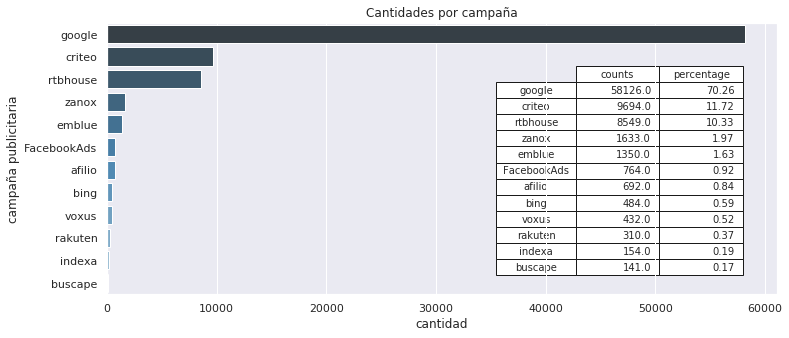

In [12]:
plt.figure(figsize=(12,5))
sns.barplot(y=campaigns_count.head(12).index,
            x=campaigns_count.head(12).counts.values,
            palette='Blues_d',
            orient='h',
            order=campaigns_count.head(12).index)
plt.title('Cantidades por campaña')
plt.xlabel('cantidad')
plt.ylabel('campaña publicitaria')
data = campaigns_count.head(12)
plt.table(cellText=data.values, rowLabels=data.index, colLabels=data.columns, cellLoc='right', rowLoc = 'center', loc='right', bbox=[.7,.07,.25,.77])
plt.show()

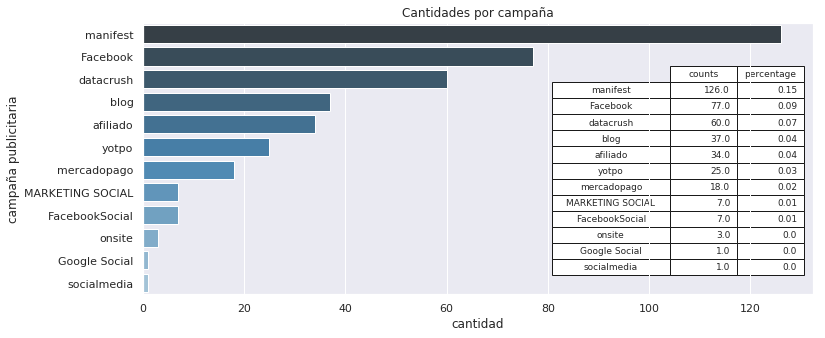

In [13]:
plt.figure(figsize=(12,5))
sns.barplot(y=campaigns_count.tail(12).index,
            x=campaigns_count.tail(12).counts.values,
            palette='Blues_d',
            orient='h',
            order=campaigns_count.tail(12).index)
plt.title('Cantidades por campaña')
plt.xlabel('cantidad')
plt.ylabel('campaña publicitaria')
data = campaigns_count.tail(12)
plt.table(cellText=data.values, rowLabels=data.index, colLabels=data.columns, cellLoc='right', rowLoc = 'center', loc='right', bbox=[.787,.07,.2,.77])
plt.show()

In [14]:
ad_camp_df.url.sample(8)

705675                  /comprar/iphone/6
165234    /comprar/samsung/galaxy-s6-edge
439990                                  /
17068                                   /
591154                                  /
454087         /comprar/samsung/galaxy-s7
657415     /comprar/samsung/galaxy-note-4
160257                                  /
Name: url, dtype: category
Categories (227, object): [/, /comprar/asus/zenfone-3-max-16gb, /comprar/asus/zenfone-5, /comprar/asus/zenfone-6, ..., /comprar/motorola/moto-z2-force, /vender/samsung/galaxy-s8-plus, /comprar/quantum/muv-up, /comprar/lg/lg-g2-mini-d618]

In [15]:
ad_camp_df = ad_camp_df.join(ad_camp_df.url.str.split('/', expand=True)\
                                               .replace({'': None})\
                                               .dropna(axis=1, how='all')\
                                               .rename(columns={1:'url_1',2:'url_2',3:'url_3'}))\
                       .drop(columns=['url'])
ad_camp_df.sample(5)

timestamp    person campaign_source    url_1     url_2  \
822419 2018-05-30 22:25:47  d15cd37c        rtbhouse  comprar  motorola   
654224 2018-05-29 01:08:16  a819f508          google     None      None   
106890 2018-03-22 17:08:14  1c544c75          google     None      None   
157804 2018-05-18 16:30:18  29a01db7        rtbhouse  comprar   samsung   
381106 2018-05-09 00:10:23  6362e76b          google  comprar    iphone   

                             url_3  
822419  motorola-moto-g-3a-geracao  
654224                        None  
106890                        None  
157804               galaxy-note-5  
381106                        None

========google=========
comprar            34363
vender               221
clube-trocafone        2
Name: url_1, dtype: int64 



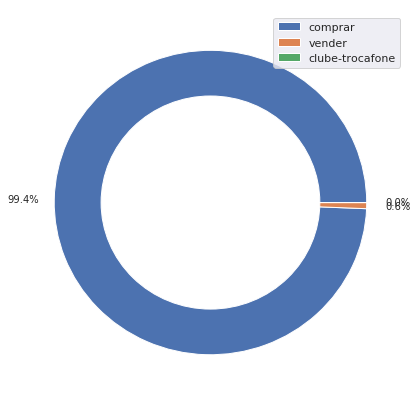

========datacrush=========
comprar               57
termos-e-condicoes     1
Name: url_1, dtype: int64 



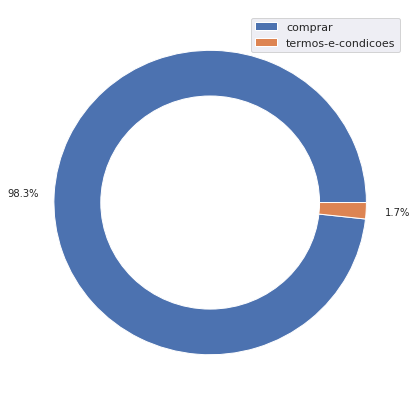

In [16]:
for source in ad_camp_df.campaign_source.unique():
  counts = ad_camp_df.loc[ad_camp_df.campaign_source == source].url_1.value_counts()
  if len(counts) > 1:
    print(f'========{source}=========')
    print(counts, '\n')
    plt.figure(figsize=(13,3))
    sns.barplot(x=counts.values, y=counts.index, palette='Greens_d', orient='h')
    plt.figure(figsize=(7,7))
    plt.pie(counts.values, autopct='%1.1f%%', pctdistance=1.2)
    p=plt.gcf()
    p.gca().add_artist(plt.Circle( (0,0), 0.7, color='white'))
    plt.legend(counts.index)
    plt.show()

In [17]:
top_camps = ad_camp_df.loc[ad_camp_df.url_1 == 'comprar',['campaign_source','url_2']]\
          .groupby('campaign_source').count()\
          .sort_values('url_2', ascending=False)\
          .reset_index().head(3).campaign_source.values

In [18]:
top_camps

[google, criteo, rtbhouse]
Categories (24, object): [Facebook, FacebookAds, FacebookSocial, afilio, ..., MARKETING SOCIAL, socialmedia, Google Social, onsite]

In [19]:
ad_camp_df.loc[(ad_camp_df.campaign_source.apply(lambda x: x in top_camps)) & (ad_camp_df.url_1 == 'comprar'),:].campaign_source.unique()

[criteo, google, rtbhouse]
Categories (3, object): [criteo, google, rtbhouse]

In [20]:
data = pd.DataFrame(ad_camp_df.loc[(ad_camp_df.campaign_source.apply(lambda x: x in top_camps)) & (ad_camp_df.url_1 == 'comprar'),['campaign_source','url_2']].groupby('campaign_source')['url_2'].apply(lambda x: x.value_counts())).reset_index()

In [21]:
data.campaign_source = data.campaign_source.astype(pd.Categorical(data.campaign_source.values.unique()))

In [22]:
data.campaign_source.dtype

CategoricalDtype(categories=['criteo', 'google', 'rtbhouse'], ordered=False)

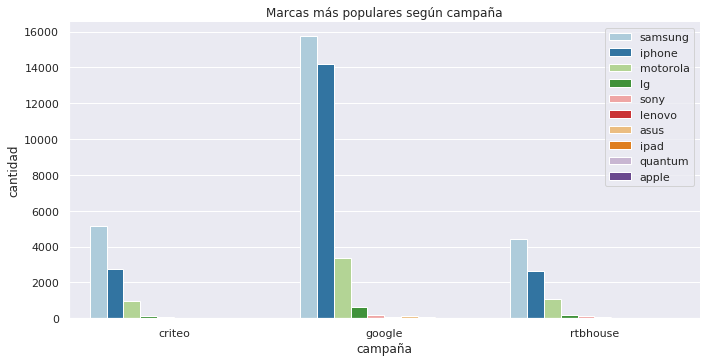

In [23]:
sns.catplot(x='campaign_source',y='url_2', hue='level_1', data=data,
            kind='bar', height=5, aspect=2,sharey='col', palette='Paired', legend=False)
plt.legend(loc='upper right')
plt.title('Marcas más populares según campaña')
plt.ylabel('cantidad')
plt.xlabel('campaña')
plt.show()

---

In [24]:
ad_camp_modelo_df = ad_camp_df.dropna(subset=['url_2','url_3'])

In [25]:
ad_camp_modelo_df['modelo'] = ad_camp_modelo_df.url_2 + '/' + ad_camp_modelo_df.url_3

/home/carlos/Documentos/7506-OrgaDatos_2018/development/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
top_camps = ad_camp_modelo_df.loc[ad_camp_modelo_df.url_1 == 'comprar',['campaign_source','modelo']]\
          .groupby('campaign_source').count()\
          .sort_values('modelo', ascending=False)\
          .reset_index().head(3).campaign_source.values

In [27]:
top_camps

[google, criteo, rtbhouse]
Categories (24, object): [Facebook, FacebookAds, FacebookSocial, afilio, ..., MARKETING SOCIAL, socialmedia, Google Social, onsite]

In [28]:
ad_camp_modelo_df.loc[(ad_camp_modelo_df.campaign_source.apply(lambda x: x in top_camps)) & (ad_camp_modelo_df.url_1 == 'comprar'),:].campaign_source.unique()

[criteo, google, rtbhouse]
Categories (3, object): [criteo, google, rtbhouse]

In [29]:
data = pd.DataFrame(ad_camp_modelo_df.loc[(ad_camp_modelo_df.campaign_source.apply(lambda x: x in top_camps)) & (ad_camp_modelo_df.url_1 == 'comprar'),['campaign_source','modelo']].groupby('campaign_source')['modelo'].apply(lambda x: x.value_counts())).reset_index()

In [30]:
data.campaign_source = data.campaign_source.astype(pd.Categorical(data.campaign_source.values.unique()))

In [31]:
data.campaign_source.dtype

CategoricalDtype(categories=['criteo', 'google', 'rtbhouse'], ordered=False)

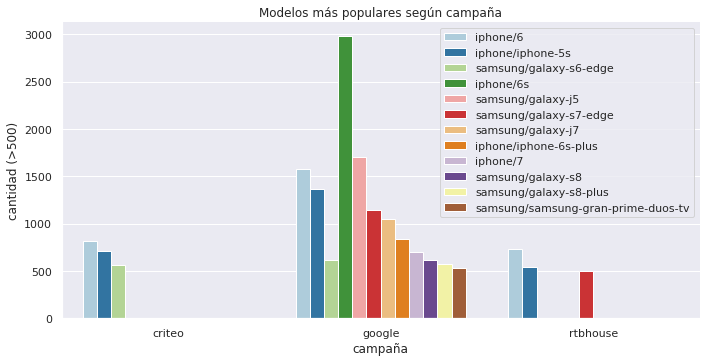

In [32]:
sns.catplot(x='campaign_source',y='modelo', hue='level_1', data=data.loc[data.modelo > 500],
            kind='bar', height=5, aspect=2,sharey='col', palette='Paired',legend=False, )
plt.title('Modelos más populares según campaña')
plt.ylabel('cantidad (>500)')
plt.xlabel('campaña')
plt.legend(loc='upper right')
plt.show()

---

### **Veo que eventos ocurren luego de *ad campaign hit***

In [33]:
# Selecciono los usuarios con eventos de campaña publicitaria
campaign_persons_df = df.loc[df.event == "ad campaign hit"].dropna(axis=1, how="all").drop(columns=['event','url']).dropna()
campaign_persons_df.sample(5)

timestamp    person campaign_source
535741 2018-05-22 16:41:52  8986616c          google
463845 2018-04-06 00:12:41  7725fce4        rtbhouse
161322 2018-04-25 16:17:51  2ab6c725          criteo
564542 2018-02-28 23:27:23  9032a01c          google
456005 2018-05-17 01:21:14  75b287c0          google

In [34]:
print(len(campaign_persons_df))
print(len(campaign_persons_df.person.unique()))

82796
21306


In [35]:
campaign_persons_uniques = campaign_persons_df.person.unique()

In [36]:
ad_campaign_events_df = df[['timestamp','person','event']].loc[df.person.apply(lambda x: x in campaign_persons_uniques),:]

In [37]:
print(len(ad_campaign_events_df))
ad_campaign_events_df.sample(8)

884974


timestamp    person              event
685330 2018-01-25 01:37:26  b04b39a5    generic listing
943356 2018-06-09 19:01:51  ef4766ee       visited site
722658 2018-05-23 00:15:45  ba102035     viewed product
558475 2018-05-16 15:54:05  8eb1e28b      brand listing
136492 2018-04-25 02:07:32  24b54e64  search engine hit
950712 2018-04-29 21:52:44  f0a31891  search engine hit
115303 2018-06-03 20:11:42  1e542102     viewed product
508    2018-05-16 20:14:16  003ff6cd      brand listing

In [38]:
ad_campaign_events_df.sort_values(['person','timestamp'], inplace=True)
ad_campaign_events_df.head(10)

timestamp    person            event
0 2018-05-31 23:38:05  0004b0a2  ad campaign hit
1 2018-05-31 23:38:05  0004b0a2     visited site
2 2018-05-31 23:38:09  0004b0a2   viewed product
3 2018-05-31 23:38:40  0004b0a2         checkout
4 2018-05-29 13:29:25  0006a21a   viewed product
5 2018-05-29 13:29:26  0006a21a     visited site
6 2018-05-29 13:29:27  0006a21a  ad campaign hit
7 2018-05-29 13:29:35  0006a21a         checkout
8 2018-04-09 20:12:31  000a54b2  generic listing
9 2018-04-09 20:12:31  000a54b2     visited site

In [39]:
ad_campaign_events_df['event'] = ad_campaign_events_df.event.str.split(' ').str.join('_')

In [40]:
%%time
after_events = {}
prev_person = ''
prev_time = ''
prev_event = ''
for idx, row in ad_campaign_events_df.iterrows():
  if(row.event == 'ad_campaign_hit'):
    prev_person, prev_event, prev_time = row.person,row.event, row.timestamp
    continue
  else:
    if((not prev_person)&(not prev_event)&(not prev_time)):
      continue
    elif(row.person == prev_person):
      if(prev_event == 'ad_campaign_hit'):
        time_diff = pd.Timedelta(row.timestamp - prev_time).seconds
        #print(f'{prev_time} -', f'{row.timestamp}:', row.timestamp - prev_time, (time_diff > 0) & (time_diff / 60 < 15))
        if((time_diff > 0) & (time_diff / 60 < 10)):
          if(row.event in after_events):
            after_events[row.event][0] += 1
            after_events[row.event][1].append(time_diff)
          else:
            after_events[row.event] = [1,[time_diff]]
          continue
    prev_person, prev_event, prev_time = row.person,row.event, row.timestamp

#print(after_events)

CPU times: user 5min 23s, sys: 424 ms, total: 5min 24s
Wall time: 5min 26s


In [41]:
events_after_campaign_df = pd.DataFrame.from_dict({'event': [x for x in after_events.keys()], 'counts':[x[0] for x in after_events.values()], 'time_diff': [x[1] for x in after_events.values()]})
events_after_campaign_df.sort_values('counts', ascending=False, inplace=True)
events_after_campaign_df

event  counts  \
2     viewed_product  107112   
1      brand_listing   17704   
4    generic_listing   11647   
5  searched_products   11588   
0           checkout    9089   
3  search_engine_hit    3643   
6       visited_site     574   
7         staticpage     528   
8         conversion     111   
9               lead       2   

                                           time_diff  
2  [43, 2, 437, 438, 567, 47, 2, 11, 14, 14, 24, ...  
1  [22, 49, 10, 486, 4, 21, 37, 69, 15, 121, 2, 2...  
4  [2, 1, 1, 18, 7, 2, 4, 2, 1, 2, 9, 1, 1, 6, 9,...  
5  [132, 10, 373, 470, 499, 130, 281, 321, 341, 4...  
0  [8, 16, 88, 36, 114, 56, 23, 220, 203, 24, 37,...  
3  [134, 133, 120, 18, 21, 68, 27, 409, 189, 93, ...  
6  [543, 2, 1, 1, 1, 7, 1, 2, 1, 149, 2, 1, 2, 57...  
7  [569, 392, 63, 205, 161, 384, 94, 118, 119, 12...  
8  [546, 550, 161, 116, 297, 419, 64, 324, 34, 53...  
9                                         [107, 229]

/home/carlos/Documentos/7506-OrgaDatos_2018/development/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/carlos/Documentos/7506-OrgaDatos_2018/development/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


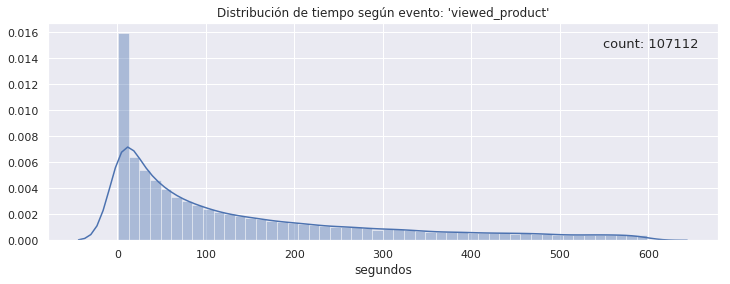

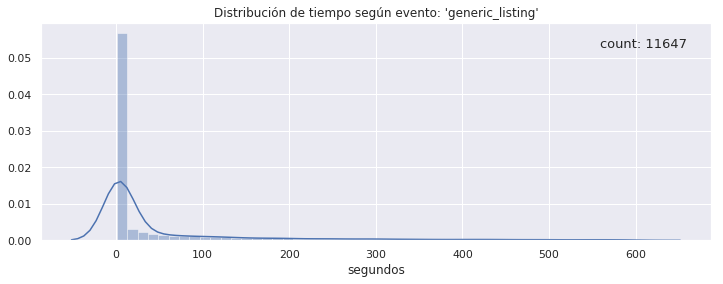

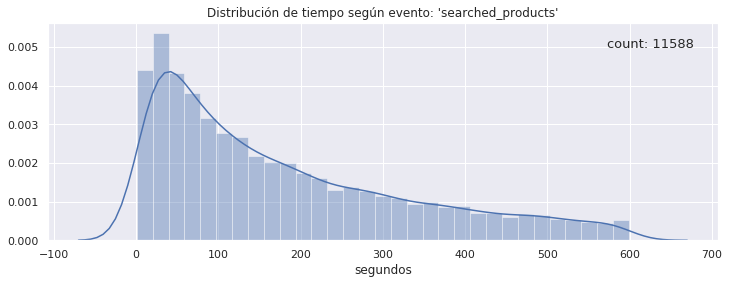

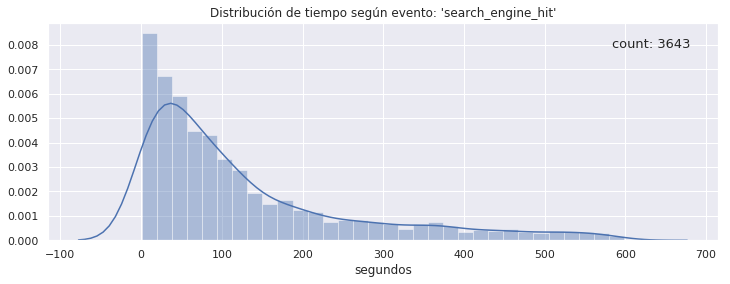

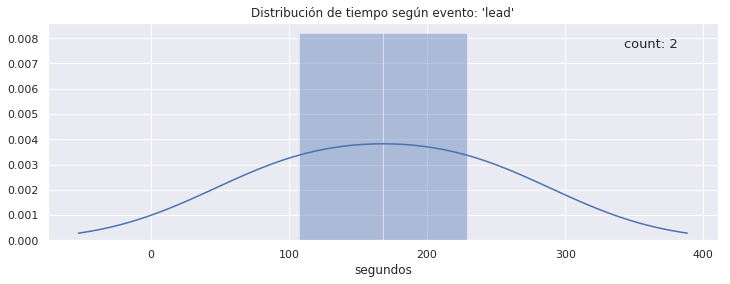

In [44]:
for event in events_after_campaign_df.event:
  data = events_after_campaign_df.loc[events_after_campaign_df.event == event,['counts','time_diff']]
  count_text = f'count: {data.values[0][0]}'
  data = pd.Series(data.values[0][1])
  f = plt.figure(figsize=(12,4))
  sns.distplot(data)
  plt.title(f'Distribución de tiempo según evento: \'{event}\'')
  plt.xlabel('segundos')
  ax = f.add_subplot(111)
  plt.text(0.9, 0.9, count_text, fontsize=13, ha='center', va='center', transform=ax.transAxes)
  plt.show()